# NDVI Analysis Anza Borrego 1984 - 2017  
## Time series, regression, stats interpretation

UC Irvine ESS 118: Programming for Environmental Science
<br>Professor Jim Randerson / TA Nicole Hemming Schroeder
<br>Spring 2021 MIDTERM

UCI researchers have attempted to better understand how climate in the desert influences vegetation. A remote sensing project within Anza Borrego State Park, using Landsat measurements, of normalized difference vegetation index (NDVI) data provides the basis to better understand how climate variability and change influences vegetation dynamics. Using  real-world data answer the following: 



#### Write Python code to make a numpy array 
that holds the first 10 years of summer temperature data from 1984-1993.  
[26.72073987, 25.78634095, 26.42492676, 25.78254414, 26.35371212, 27.05580988, 26.47029177, 25.55941882, 26.81911351, 25.71038646]

In [2]:
import matplotlib.pyplot as py
import numpy as np
import scipy.stats as stats

In [3]:
Summer = np.array([26.72073987, 25.78634095, 26.42492676, 25.78254414, 26.35371212, 27.05580988, 26.47029177, 25.55941882, 26.81911351, 25.71038646])

#### Estimate the length of the array and print out the length as output.

In [20]:
print("The length of the array is", len(Summer))

The length of the array is 10


#### Compute the mean of the array. 

In [26]:
mSummer = np.mean(Summer)
print("The mean summer temperature from 1984 through 1993 is {0:0.4} degrees C.".format(mSummer))

The mean summer temperature from 1984 through 1993 is 26.27 degrees C.


#### Sort the array from lowest to highest and print it out. 


In [28]:
SortSummer = np.sort(Summer)
print("The sorted values:", SortSummer)

The sorted values: [25.55941882 25.71038646 25.78254414 25.78634095 26.35371212 26.42492676
 26.47029177 26.72073987 26.81911351 27.05580988]


#### Provide Python code to “slice” the temperature array.
to create a new array containing only the last 5 points.

In [7]:
LastPoints = Summer[-5:]
print(LastPoints)

[27.05580988 26.47029177 25.55941882 26.81911351 25.71038646]


#### Open the “CaliforniaAnzaClimateNDVI.csv” 
file using the numpy load text function and read the data to create numpy 1 dimensional arrays for desert_NDVI (second column) and year (first column).  

In [8]:
Anza = "CaliforniaAnzaClimateNDVI.csv"
AnzaData = np.loadtxt(Anza, skiprows=1, delimiter =",")
NDVI     = AnzaData[:,1]
Year     = AnzaData[:,0]
Temp     = AnzaData[:,3]
Precip   = AnzaData[:,5]

print(NDVI[0],Year[0], Temp[0], Precip[0])

0.086120509 1984.0 26.72073987 122.3109291


### Make a time series plot of desert NDVI versus year. 
Label the axes. NDVI is unitless, so you can just say NDVI for y axis label.

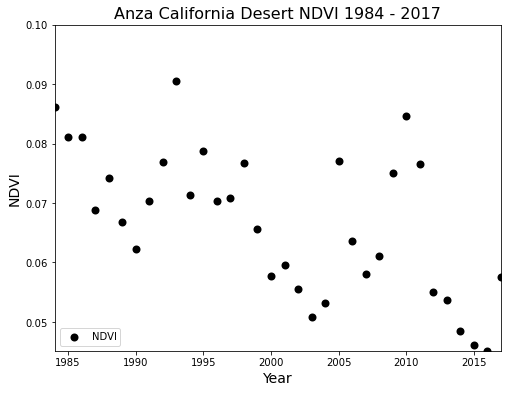

In [34]:
#observational data plotted in black, models in color
fig = py.figure(figsize=(8, 6))
ax = py.axes()
ax.scatter(Year, NDVI, linewidth=2.0, c = 'k')
ax.set(xlim = (1984.0, 2017.0), ylim = (0.04515, 0.10))
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("NDVI", fontsize=14)
ax.legend(["NDVI", "Guess"], loc="lower left", fontsize=10)
ax.set_title("Anza California Desert NDVI 1984 - 2017", fontsize = 16);

# Is NDVI changing over time?  
Fit a regression line to the desert NDVI time series and add this to your plot. 

<br>What is the slope of the NDVI regression line and is the trend significant?  
Is NDVI increasing or decreasing over time?

In [10]:
m,o,r_value,p_value,stderrslope = stats.linregress(Year, NDVI)
ybestlr = m*Year + o 
print("Linear regression parameters are: slope {0:.4f} intercept {1:.2f}".format(m,o))
print("Correlation: {0:5.4f}".format(r_value))
print("Significance: {0:5.4f}".format(p_value))

Linear regression parameters are: slope -0.0007 intercept 1.55
Correlation: -0.6101
Significance: 0.0001


NDVI is decreasing with time. The negative slope of the regression line is significant at 0.0001 with a P-Value of < 0.05 representing a high confidence in the decreasing trend. 

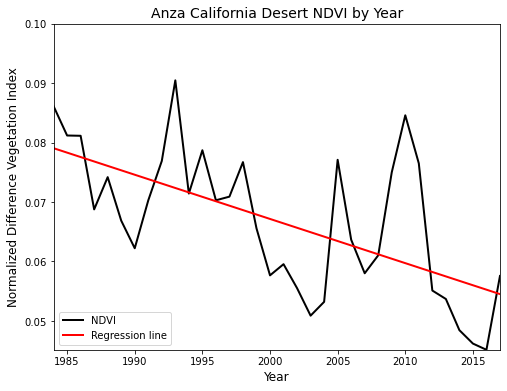

In [35]:
fig = py.figure(figsize=(8, 6))
ax = py.axes()
ax.plot(Year, NDVI, linewidth=2.0,  c = 'k')
ax.plot(Year, ybestlr, color = "red", linewidth=2.0)
ax.set(xlim = (1984.0, 2017.0), ylim = (0.04515, 0.10))
ax.set_xlabel("Year",fontsize=12)
ax.set_ylabel("Normalized Difference Vegetation Index", fontsize=12)
ax.legend(["NDVI", "Regression line"], loc="lower left", fontsize=10)
ax.set_title("Anza California Desert NDVI by Year", fontsize = 14);

# Is desert temperature changing over time?  
Fit a regression line to the desert temperature time series 
<br>*(desert_temp; 4th column; units are degrees C)*
<br>and make a new plot. 

What is the slope of the trend and is the regression significant? 
<br>Is temperature increasing or decreasing over time?

In [12]:
m,o,r_value,p_value,stderrslope = stats.linregress(Year, Temp)
ybestlr2 = m*Year + o 
print("Linear regression parameters are: slope {0:.4f} intercept {1:.2f}".format(m,o))
print("Correlation: {0:5.4f}".format(r_value))
print("Significance: {0:5.4f}".format(p_value))

Linear regression parameters are: slope 0.0359 intercept -45.15
Correlation: 0.4909
Significance: 0.0032


Temperature is increasing over time. The positive slope of the regession line is significant at 0.003, p < 0.05. This represents a high confidence in the increasing trend.

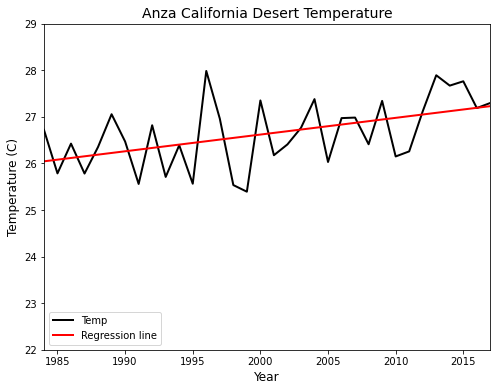

In [36]:
fig = py.figure(figsize=(8, 6))
ax = py.axes()
ax.plot(Year, Temp, linewidth=2.0,  c = 'k')
ax.plot(Year, ybestlr2, color = "red", linewidth=2.0)
ax.set(xlim = (1984.0, 2017.0), ylim = (22.00, 29.00))
ax.set_xlabel("Year",fontsize=12)
ax.set_ylabel("Temperature (C)", fontsize=12)
ax.legend(["Temp", "Regression line"], loc="lower left", fontsize=10)
ax.set_title("Anza California Desert Temperature", fontsize = 14);

### Consider using the scipy.stats.pearsonr function for this question.

What is the correlation between NDVI and desert summer temperature?
<br> What is the correlation between NDVI and desert precipitation (desert_prec, 6th column; units mm/y)?   

In [14]:
PlantTemp   = stats.pearsonr(NDVI, Temp) 
PlantPrecip = stats.pearsonr(NDVI, Precip) 

print("Pearson correlation coefficient and the p-value for non-correlation.")
print(PlantTemp)
print(PlantPrecip)

Pearson correlation coefficient and the p-value for non-correlation.
(-0.5773271439612649, 0.00035047072425746707)
(0.5820810829068115, 0.00030472158135516235)


# Interpretation  
Based on the NDVI trend, the temperature trend, and the correlations you observe between temperature and NDVI, and between precipitation and NDVI, what is the impact of climate change on vegetation cover in this region?  

*hint: Draw upon your general knowledge of Earth System Science and terrestrial ecology in your answer.* 

The Pearson correlation for Temperatures in the Anza desert have a negative relationship, meaning that as Years (x variable) increase the NDVI (y values) will decrease. Even though NDVI is normalized between +1.0 to -1.0 midrange values represent shrubs and grasses but lower values indicate barren areas of rock. The P-value for this relationship is also significant at 0.003, p < 0.05. This represents a high confidence in the increasing trend.

Similarly, the same analysis using precipitation found that the relationship between NDVI and precipitation is positive, or that as precipitation increases, so will NDVI. This might be more easily understood as, if it rains more, more plants will be able to thrive.

NDVI is directly related to the photosynthetic capacity and hence energy absorption of plants. The amount of vegetation in a desert environment is much less than a forest canopy, but is nonetheless also profoundly impacted by changes in primary drivers, such as temperature or precipitation. Even robust desert plants are evolved to a range that they can survive. Given the strong and significant trends in precipitation and temperature, these bounds are likely to result in less biomass.